# Import Libary & Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('ai4i2020.csv')
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [ ]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


# EDA

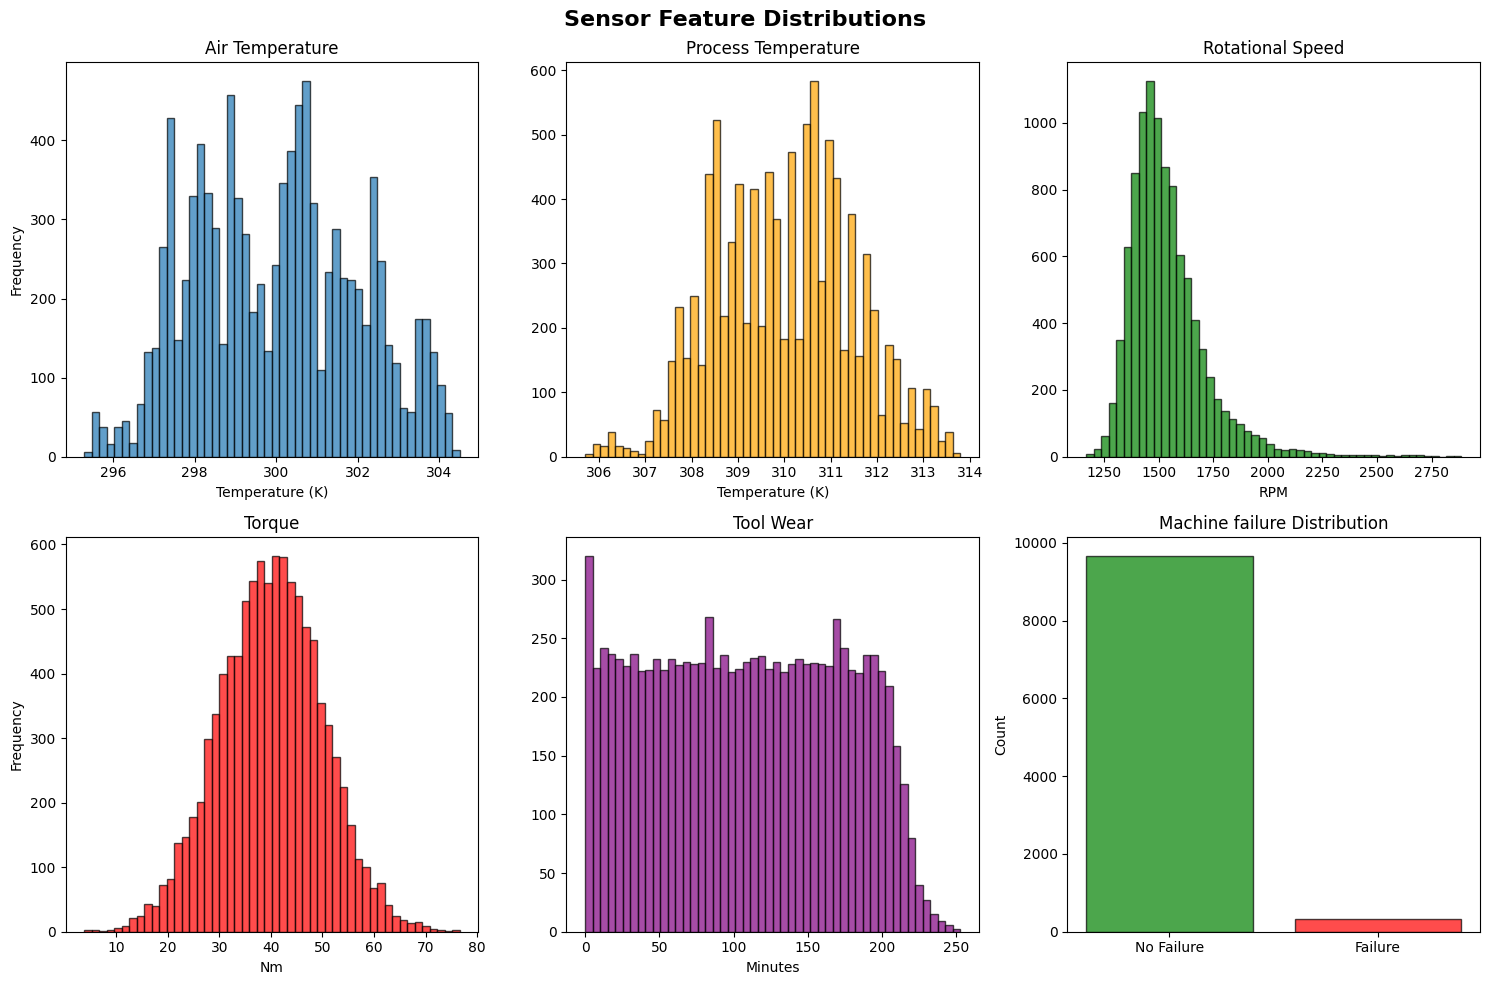

In [ ]:
# Create figure for distributions
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Sensor Feature Distributions', fontsize=16, fontweight='bold')

# Plot distributions
if 'Air temperature [K]' in df.columns:
    axes[0, 0].hist(df['Air temperature [K]'], bins=50, edgecolor='black', alpha=0.7)
    axes[0, 0].set_title('Air Temperature')
    axes[0, 0].set_xlabel('Temperature (K)')
    axes[0, 0].set_ylabel('Frequency')

if 'Process temperature [K]' in df.columns:
    axes[0, 1].hist(df['Process temperature [K]'], bins=50, edgecolor='black', alpha=0.7, color='orange')
    axes[0, 1].set_title('Process Temperature')
    axes[0, 1].set_xlabel('Temperature (K)')

if 'Rotational speed [rpm]' in df.columns:
    axes[0, 2].hist(df['Rotational speed [rpm]'], bins=50, edgecolor='black', alpha=0.7, color='green')
    axes[0, 2].set_title('Rotational Speed')
    axes[0, 2].set_xlabel('RPM')

if 'Torque [Nm]' in df.columns:
    axes[1, 0].hist(df['Torque [Nm]'], bins=50, edgecolor='black', alpha=0.7, color='red')
    axes[1, 0].set_title('Torque')
    axes[1, 0].set_xlabel('Nm')
    axes[1, 0].set_ylabel('Frequency')

if 'Tool wear [min]' in df.columns:
    axes[1, 1].hist(df['Tool wear [min]'], bins=50, edgecolor='black', alpha=0.7, color='purple')
    axes[1, 1].set_title('Tool Wear')
    axes[1, 1].set_xlabel('Minutes')

if 'Machine failure' in df.columns:
    target_counts = df['Machine failure'].value_counts()
    axes[1, 2].bar(['No Failure', 'Failure'], target_counts.values,
                   color=['green', 'red'], alpha=0.7, edgecolor='black')
    axes[1, 2].set_title('Machine failure Distribution')
    axes[1, 2].set_ylabel('Count')

plt.tight_layout()

# Preprocessing & Feature Selection

Backward Elimination

In [ ]:
import statsmodels.api as sm

Selected_Features = []

def backward_selection(X, y, threshold_out=0.05, verbose=True):
    """
    Backward Stepwise Regression for feature selection
    """
    included = list(X.columns)

    while True:
        changed = False
        X_with_const = sm.add_constant(X[included])
        model = sm.OLS(y, X_with_const).fit()

        # Exclude intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max()

        if worst_pval > threshold_out:
            changed = True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print(f"Dropped: {worst_feature} (p-value={worst_pval:.4f})")

        if not changed:
            break

    Selected_Features.append(included)
    print("\nSelected Features:", included)
    return included


In [ ]:
# Candidate sensor features
candidate_features = [
    "Air temperature [K]",
    "Process temperature [K]",
    "Rotational speed [rpm]",
    "Torque [Nm]",
    "Tool wear [min]"
]

X_tab = df[candidate_features]
y_tab = df["Machine failure"]

selected_features = backward_selection(X_tab, y_tab)


Selected Features: ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']


In [ ]:
df_normal = df[df["Machine failure"] == 0].copy()
df_failure = df[df["Machine failure"] == 1].copy()

print("Normal samples :", len(df_normal))
print("Failure samples:", len(df_failure))

Normal samples : 9661
Failure samples: 339


In [ ]:
# Feature Scaling

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_normal = df_normal[selected_features].values
X_normal_scaled = scaler.fit_transform(X_normal)

X_failure = df_failure[selected_features].values
X_failure_scaled = scaler.transform(X_failure)


In [ ]:
def create_sequences(X, window_size):
    sequences = []
    for i in range(len(X) - window_size):
        sequences.append(X[i:i + window_size])
    return np.array(sequences)

WINDOW_SIZE = 10

X_normal_seq = create_sequences(X_normal_scaled, WINDOW_SIZE)
X_failure_seq = create_sequences(X_failure_scaled, WINDOW_SIZE)

print("Normal sequence shape :", X_normal_seq.shape)
print("Failure sequence shape:", X_failure_seq.shape)


Normal sequence shape : (9651, 10, 5)
Failure sequence shape: (329, 10, 5)


# Modelling

Split Test

In [ ]:
# Normal data split
n = len(X_normal_seq)
train_end = int(0.6 * n)
val_end   = int(0.8 * n)

X_train = X_normal_seq[:train_end]
X_val   = X_normal_seq[train_end:val_end]
X_test_normal = X_normal_seq[val_end:]

# Test = normal unseen + failure
X_test = np.concatenate([X_test_normal, X_failure_seq])

y_test = np.concatenate([
    np.zeros(len(X_test_normal)),
    np.ones(len(X_failure_seq))
])

print("Train sequences:", X_train.shape)
print("Val sequences  :", X_val.shape)

Train sequences: (5790, 10, 5)
Val sequences  : (1930, 10, 5)


## LSTM

### Build model

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, RepeatVector, TimeDistributed, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# LSTM Autoencoder

timesteps = X_train.shape[1]
n_features = X_train.shape[2]

input_layer = Input(shape=(timesteps, n_features))

# Encoder
encoded = LSTM(32, activation="tanh", return_sequences=False)(input_layer)

# Bottleneck
bottleneck = RepeatVector(timesteps)(encoded)

# Decoder
decoded = LSTM(32, activation="tanh", return_sequences=True)(bottleneck)
decoded = TimeDistributed(Dense(n_features))(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)

autoencoder.compile(
    optimizer=Adam(learning_rate=0.001),
    loss="mse"
)

autoencoder.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 10, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 32)             │         4,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector (RepeatVector)    │ (None, 10, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 10, 32)         │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, 10, 5)          │           165 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,349 (52.14 KB)

 Trainable params: 13,349 (52.14 KB)

 Non-trainable params: 0 (0.00 B)

### Train


In [ ]:
# Train LSTM Model

early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True
)

model_lstm = autoencoder.fit(
    X_train,
    X_train,              # target = input
    validation_data=(X_val, X_val),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)


Epoch 1/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - loss: 0.0727 - val_loss: 0.0128
Epoch 2/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0115 - val_loss: 0.0112
Epoch 3/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0102 - val_loss: 0.0098
Epoch 4/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0089 - val_loss: 0.0090
Epoch 5/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0084 - val_loss: 0.0089
Epoch 6/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0081 - val_loss: 0.0087
Epoch 7/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0081 - val_loss: 0.0085
Epoch 8/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0079 - val_loss: 0.0083
Epoch 9/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0077 - val_loss: 0.0081
Epoch 10/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0074 - val_loss: 0.0078
Epoch 11/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0073 - val_loss: 0.0076
Epoch 12/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
import numpy as np

# Reconstruction on train (normal)
X_train_pred = autoencoder.predict(X_train)
train_error = np.mean(
    np.square(X_train - X_train_pred),
    axis=(1, 2)
)

# Reconstruction on test (normal + failure)
X_test_pred = autoencoder.predict(X_test)
test_error = np.mean(
    np.square(X_test - X_test_pred),
    axis=(1, 2)
)


181/181 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


### Evaluation

In [ ]:
threshold = np.percentile(train_error, 90)

print("Anomaly threshold:", threshold)

Anomaly threshold: 0.0068337534778747195


In [ ]:
y_pred_anomaly = (test_error > threshold).astype(int)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print("LSTM Autoencoder - Anomaly Detection Report:")
print(classification_report(y_test, y_pred_anomaly))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_anomaly))

LSTM Autoencoder - Anomaly Detection Report:
              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96      1931
         1.0       0.71      0.95      0.81       329

    accuracy                           0.94      2260
   macro avg       0.85      0.94      0.89      2260
weighted avg       0.95      0.94      0.94      2260

Confusion Matrix:
[[1800  131]
 [  15  314]]


## Transformer

### Build Model

Encode

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Layer

class PositionalEncoding(Layer):
    def __init__(self, sequence_length, d_model):
        super().__init__()
        pos = np.arange(sequence_length)[:, np.newaxis]
        i = np.arange(d_model)[np.newaxis, :]
        angle_rates = 1 / np.power(10000, (2 * (i // 2)) / d_model)
        angle_rads = pos * angle_rates

        angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])
        angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])

        self.pos_encoding = tf.constant(
            angle_rads[np.newaxis, ...],
            dtype=tf.float32
        )

    def call(self, x):
        return x + self.pos_encoding


In [ ]:
from tensorflow.keras.layers import Dense, Dropout, LayerNormalization, MultiHeadAttention

def transformer_block(inputs, head_size, num_heads, ff_dim, dropout):
    attn = MultiHeadAttention(
        num_heads=num_heads,
        key_dim=head_size,
        dropout=dropout
    )(inputs, inputs)

    x = LayerNormalization(epsilon=1e-6)(inputs + attn)

    ff = Dense(ff_dim, activation="relu")(x)
    ff = Dense(inputs.shape[-1])(ff)
    ff = Dropout(dropout)(ff)

    return LayerNormalization(epsilon=1e-6)(x + ff)


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

def build_transformer_autoencoder_with_bottleneck(
    input_shape,
    head_size=32,
    num_heads=2,
    ff_dim=64,
    num_blocks=2,
    bottleneck_ratio=0.5,
    dropout=0.2
):
    inputs = Input(shape=input_shape)

    # Positional Encoding
    x = PositionalEncoding(input_shape[0], input_shape[1])(inputs)

    # Encoder
    for _ in range(num_blocks):
        x = transformer_block(
            x,
            head_size=head_size,
            num_heads=num_heads,
            ff_dim=ff_dim,
            dropout=dropout
        )

    # BOTTLENECK (SOFT & STABIL)
    compressed_dim = int(input_shape[1] * bottleneck_ratio)

    x = Dense(compressed_dim, activation="linear", name="bottleneck_dense")(x)
    x = Dropout(0.3, name="bottleneck_dropout")(x)

    # Expand back
    x = Dense(input_shape[1], activation="linear", name="bottleneck_expand")(x)

    # Decoder
    for _ in range(num_blocks):
        x = transformer_block(
            x,
            head_size=head_size,
            num_heads=num_heads,
            ff_dim=ff_dim,
            dropout=dropout
        )

    outputs = x

    model = Model(inputs, outputs)
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
        loss="mse"
    )

    return model


In [ ]:
input_shape = (X_train.shape[1], X_train.shape[2])

transformer_ae = build_transformer_autoencoder_with_bottleneck(
    input_shape=input_shape,
    head_size=32,
    num_heads=2,
    ff_dim=64,
    num_blocks=2,
    bottleneck_ratio=0.5,
    dropout=0.2
)

transformer_ae.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 10, 5)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ positional_encoding │ (None, 10, 5)     │          0 │ input_layer_1[0]… │
│ (PositionalEncodin… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 10, 5)     │      1,477 │ positional_encod… │
│ (MultiHeadAttentio… │                   │            │ positional_encod… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 10, 5)     │          0 │ positional_encod… │
│                     │                   │            │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalization │ (None, 10, 5)     │         10 │ add[0][0]         │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 10, 64)    │        384 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 10, 5)     │        325 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 10, 5)     │          0 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 10, 5)     │          0 │ layer_normalizat… │
│                     │                   │            │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 10, 5)     │         10 │ add_1[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 10, 5)     │      1,477 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, 10, 5)     │          0 │ layer_normalizat… │
│                     │                   │            │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 10, 5)     │         10 │ add_2[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 10, 64)    │        384 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 10, 5)     │        325 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 10, 5)     │          0 │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_3 (Add)         │ (None, 10, 5)     │          0 │ layer_normalizat… │
│                     │                   │            │ dropout_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 10, 5)     │         10 │ add_3[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bottleneck_dense    │ (None, 10, 2)     │         12 │ layer_normalizat

 Total params: 8,851 (34.57 KB)

 Trainable params: 8,851 (34.57 KB)

 Non-trainable params: 0 (0.00 B)

### Train

In [ ]:
early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True
)

model_transformer = transformer_ae.fit(
    X_train,
    X_train,
    validation_data=(X_val, X_val),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)


Epoch 1/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 18s 25ms/step - loss: 1.1758 - val_loss: 0.9382
Epoch 2/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.9649 - val_loss: 0.8697
Epoch 3/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.8975 - val_loss: 0.8081
Epoch 4/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.8344 - val_loss: 0.7502
Epoch 5/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.7672 - val_loss: 0.6903
Epoch 6/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.7087 - val_loss: 0.6409
Epoch 7/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.6622 - val_loss: 0.5940
Epoch 8/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.6170 - val_loss: 0.5488
Epoch 9/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.5721 - val_loss: 0.5060
Epoch 10/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.5307 - val_loss: 0.4646
Epoch 11/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.4899 - val_loss: 0.4251
Epoch 12/50
181/181 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
import numpy as np

# Reconstruction on train (NORMAL only)
X_train_pred_tr = transformer_ae.predict(X_train)
train_error_tr = np.mean(
    np.square(X_train - X_train_pred_tr),
    axis=(1, 2)
)

# Reconstruction on test (NORMAL + FAILURE)
X_test_pred_tr = transformer_ae.predict(X_test)
test_error_tr = np.mean(
    np.square(X_test - X_test_pred_tr),
    axis=(1, 2)
)


181/181 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


### Evaluation

In [ ]:
threshold_tr = np.percentile(train_error_tr, 90)

print("Transformer anomaly threshold:", threshold_tr)

Transformer anomaly threshold: 0.04329044314597625


In [ ]:
y_pred_tr = (test_error_tr > threshold_tr).astype(int)

In [ ]:
print("Transformer Autoencoder - Evaluation")
print(classification_report(y_test, y_pred_tr))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_tr))


Transformer Autoencoder - Evaluation
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.96      1931
         1.0       0.85      0.70      0.77       329

    accuracy                           0.94      2260
   macro avg       0.90      0.84      0.87      2260
weighted avg       0.94      0.94      0.94      2260

Confusion Matrix:
[[1892   39]
 [ 100  229]]


# Visualization

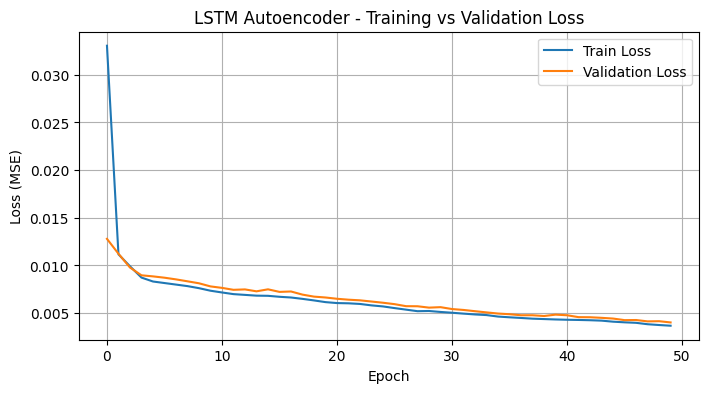

In [ ]:
import matplotlib.pyplot as plt

def plot_loss(history, title):
    plt.figure(figsize=(8, 4))
    plt.plot(history.history["loss"], label="Train Loss")
    plt.plot(history.history["val_loss"], label="Validation Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss (MSE)")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

plot_loss(model_lstm, "LSTM Autoencoder - Training vs Validation Loss")


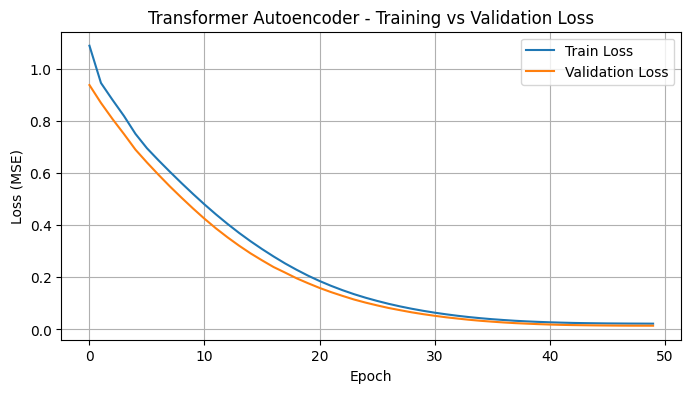

In [ ]:
import matplotlib.pyplot as plt

def plot_loss(history, title):
    plt.figure(figsize=(8, 4))
    plt.plot(history.history["loss"], label="Train Loss")
    plt.plot(history.history["val_loss"], label="Validation Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss (MSE)")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

plot_loss(model_transformer, "Transformer Autoencoder - Training vs Validation Loss")


# Test Model

In [ ]:
from collections import deque

WINDOW_SIZE = 10
sequence_buffer = deque(maxlen=WINDOW_SIZE)


In [ ]:
def realtime_anomaly_detection(new_row, model, threshold):
    # Take Feature base on sequence training
    x = np.array([new_row[f] for f in selected_features]).reshape(1, -1)

    # Scaling
    x_scaled = scaler.transform(x)

    # Turn into Sliding Windows
    sequence_buffer.append(x_scaled[0])

    if len(sequence_buffer) < WINDOW_SIZE:
        return "WAITING", None

    # Make sequence (1, window, feature)
    seq = np.array(sequence_buffer).reshape(
        1, WINDOW_SIZE, len(selected_features)
    )

    # Rekonstruction
    recon = model.predict(seq, verbose=0)

    # Reconstruction error
    error = np.mean(np.square(seq - recon))

    status = "ANOMALY" if error > threshold else "NORMAL"

    return status, error


In [ ]:
def generate_normal_row():
    base = df_normal[selected_features].mean().values
    std  = df_normal[selected_features].std().values

    noise = np.random.normal(0, 0.5 * std)
    values = base + noise

    return dict(zip(selected_features, values))


In [ ]:
def generate_drift_row(step, max_step, severity=3.0):
    base = df_normal[selected_features].mean().values
    std  = df_normal[selected_features].std().values

    drift = (step / max_step) * severity * std
    noise = np.random.normal(0, 0.3 * std)

    values = base + drift + noise

    return dict(zip(selected_features, values))


In [ ]:
def generate_anomaly_row():
    base = df_normal[selected_features].mean().values
    std  = df_normal[selected_features].std().values

    anomaly_scale = np.random.uniform(3, 5)
    noise = np.random.normal(0, 0.5 * std)

    values = base + anomaly_scale * std + noise

    return dict(zip(selected_features, values))


In [ ]:
def test_model(model, threshold, title):
    sequence_buffer.clear()
    print(title)

    for i in range(20):
        # Ground truth phase
        if i < 7:
            row = generate_normal_row()
            phase = "NORMAL"
        elif i < 14:
            row = generate_drift_row(i-7, 7, severity=3.5)
            phase = "DRIFT"
        else:
            row = generate_anomaly_row()
            phase = "FAILURE"

        # Model prediction
        prediction, error = realtime_anomaly_detection(row, model, threshold)

        if error is None:
            print(
                f"Step {i+1:02d} | Phase={phase:<7} | Prediction=WAITING"
            )
        else:
            print(
                f"Step {i+1:02d} | Phase={phase:<7} "
                f"| Prediction={prediction:<7} | Error={error:.6f}"
            )


In [ ]:
test_model(autoencoder, threshold, "=== LSTM TEST ===")
print("\n")
test_model(transformer_ae, threshold_tr, "=== TRANSFORMER TEST ===")

=== LSTM TEST ===
Step 01 | Phase=NORMAL  | Prediction=WAITING
Step 02 | Phase=NORMAL  | Prediction=WAITING
Step 03 | Phase=NORMAL  | Prediction=WAITING
Step 04 | Phase=NORMAL  | Prediction=WAITING
Step 05 | Phase=NORMAL  | Prediction=WAITING
Step 06 | Phase=NORMAL  | Prediction=WAITING
Step 07 | Phase=NORMAL  | Prediction=WAITING
Step 08 | Phase=DRIFT   | Prediction=WAITING
Step 09 | Phase=DRIFT   | Prediction=WAITING
Step 10 | Phase=DRIFT   | Prediction=ANOMALY | Error=0.010768
Step 11 | Phase=DRIFT   | Prediction=ANOMALY | Error=0.017074
Step 12 | Phase=DRIFT   | Prediction=ANOMALY | Error=0.025284
Step 13 | Phase=DRIFT   | Prediction=ANOMALY | Error=0.033551
Step 14 | Phase=DRIFT   | Prediction=ANOMALY | Error=0.045461
Step 15 | Phase=FAILURE | Prediction=ANOMALY | Error=0.056008
Step 16 | Phase=FAILURE | Prediction=ANOMALY | Error=0.066342
Step 17 | Phase=FAILURE | Prediction=ANOMALY | Error=0.060764
Step 18 | Phase=FAILURE | Prediction=ANOMALY | Error=0.062346
Step 19 | Phase=FAI

## Save Model

In [ ]:
autoencoder.save("lstm_autoencoder.keras")

In [ ]:
transformer_ae.save("transformer_autoencoder.keras")

In [ ]:
import pickle

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)


In [ ]:
with open("history_lstm.pkl", "wb") as f:
    pickle.dump(model_lstm.history, f)

with open("history_transformer.pkl", "wb") as f:
    pickle.dump(model_transformer.history, f)